<center><h1>Model V3 - NMF and AUC metrics</h1></center>

<hr>

Model v1, Model v2 모두 평가 지표로 accuracy를 사용했다. 하지만 과제는 평가 지표로 AUC를 사용하며, 결과값 역시 0 또는 1이 아닌 0과 1 사이의 값으로 나온다. 이를 반영한 Model v3을 작성한다

## Table of Contents

1. [Environment Setting](#1)
    1. [Import Library](#1.1)
    2. [Load Datasets](#1.2)]
2. [Preprocessing](#2)
    1. [Preprocess members.csv](#2.1)
    2. [Preprocess songs.csv](#2.2)
    3. [Preprocess song_extra_info.csv](#2.3)
    4. [Preprocess train.csv and test.csv](#2.4)
3. [Data Modeling](#3)
    1. [Split Trian and Validation Dataset](#3.1)
    2. [Matrix Factorization: NMF](#3.2)
    3. [Neural Network Model](#3.3)
4. [Evaluation](#4)
    1. [Evaluate on validation](#4.1)
5. [Submission](#5)
    1. [Make Submission](#5.1)

# 1. Environment Setting <a id="1"></a>

## 1. Import Library <a id="1.1"></a>

In [1]:
# Counter
from collections import Counter

# Linear Algebra
import numpy as np

# Dataframe
import pandas as pd

# Visualization
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

# FOR Loop Verbose
from tqdm import tqdm

# Matrix Factorization
from sklearn.decomposition import NMF

# Neural Network
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
pd.options.display.max_rows = 499
pd.options.display.max_columns = 499
pd.options.mode.chained_assignment = None

In [3]:
fname = '../static/fonts/D2Coding.ttc'
font_family = fm.FontProperties(fname=fname).get_name()
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = 16

In [4]:
plt.style.use('seaborn-darkgrid')

In [5]:
%matplotlib inline

## 2. Import Datasets <a id="1.2"></a>

In [6]:
train_raw = pd.read_csv('../data/train.csv')
test_raw = pd.read_csv('../data/test.csv')
sample_submission_raw = pd.read_csv('../data/sample_submission.csv')

members_raw = pd.read_csv('../data/members.csv')
songs_raw = pd.read_csv('../data/songs.csv')
song_extra_info_raw = pd.read_csv('../data/song_extra_info.csv')

# 2. Preprocessing <a id="2"></a>

## 1. Preprocess members.csv <a id="2.1"></a>

In [7]:
members_raw.shape

(34403, 7)

In [8]:
members_raw.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [9]:
members_raw.describe(include='all')

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
count,34403,34403.000000,34403.000000,14501,34403.000000,3.440300e+04,3.440300e+04
unique,34403,NaN,NaN,2,NaN,NaN,NaN
top,s3ZtRN7tCvJD/fubJWe2iRc6AUVRUFmUl/1s0sKt78E=,NaN,NaN,male,NaN,NaN,NaN
freq,1,NaN,NaN,7405,NaN,NaN,NaN
mean,NaN,5.371276,12.280935,NaN,5.953376,2.013994e+07,2.016901e+07
std,NaN,6.243929,18.170251,NaN,2.287534,2.954015e+04,7.320925e+03
min,NaN,1.000000,-43.000000,NaN,3.000000,2.004033e+07,1.970010e+07
25%,NaN,1.000000,0.000000,NaN,4.000000,2.012103e+07,2.017020e+07
50%,NaN,1.000000,0.000000,NaN,7.000000,2.015090e+07,2.017091e+07
75%,NaN,10.000000,25.000000,NaN,9.000000,2.016110e+07,2.017093e+07


In [10]:
members_raw.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [11]:
members_proc = members_raw.copy()

### city

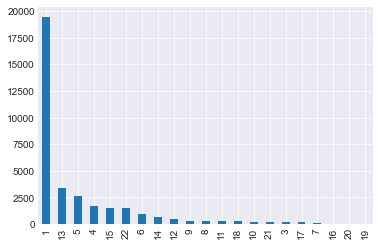

In [12]:
members_proc.city.value_counts().plot(kind='bar')

### bd

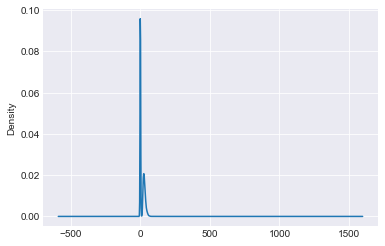

In [13]:
members_proc.bd.plot(kind='kde')

In [14]:
members_proc.bd.min()

-43

In [15]:
members_proc.bd.max()

1051

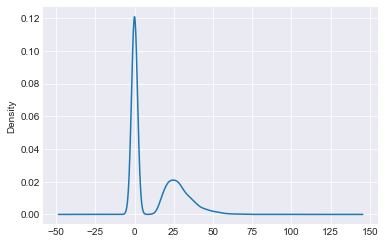

In [16]:
members_proc.loc[members_proc.bd.isin(range(0, 101)), 'bd'].plot(kind='kde')

### gender

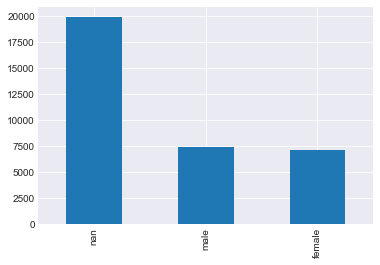

In [17]:
members_proc.gender.value_counts(dropna=False).plot(kind='bar')

In [18]:
members_proc['gender'] = members_proc.gender.fillna('missing')

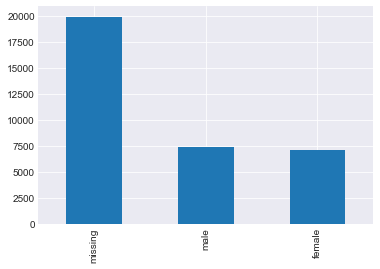

In [19]:
members_proc.gender.value_counts(dropna=False).plot(kind='bar')

### registered_via

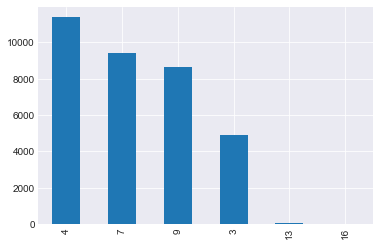

In [20]:
members_proc.registered_via.value_counts().plot(kind='bar')

### registration_init_time

In [21]:
members_proc['registration_init_time_year'] = pd.to_datetime(members_proc.registration_init_time, format='%Y%m%d').dt.year

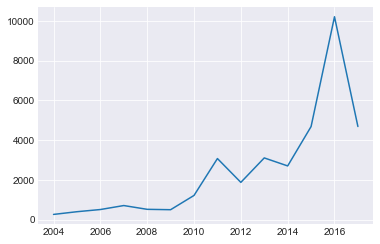

In [22]:
members_proc.registration_init_time_year.value_counts().sort_index().plot()

### expiration_date

In [23]:
members_proc['expiration_date_year'] = pd.to_datetime(members_proc.expiration_date, format='%Y%m%d').dt.year

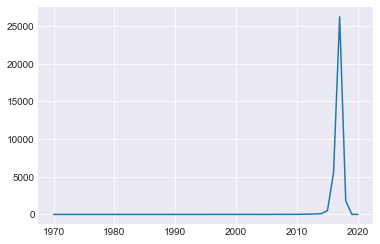

In [24]:
members_proc.expiration_date_year.value_counts().sort_index().plot()

In [25]:
members_proc.expiration_date_year.min()

1970

In [26]:
members_proc.expiration_date_year.max()

2020

In [27]:
members_proc[members_proc.expiration_date_year.isin(range(1970, 2001))]

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,expiration_date_year
16867,1Y+bNz3FxSoJnKOcR/Q8VJGXZbWIstrW0HfBe5LZzKA=,1,0,missing,9,20140501,19700101,2014,1970


### membership_days (custom)

In [28]:
members_proc['membership_days'] = (pd.to_datetime(members_proc.expiration_date, format='%Y%m%d') - pd.to_datetime(members_proc.registration_init_time, format='%Y%m%d')).dt.days

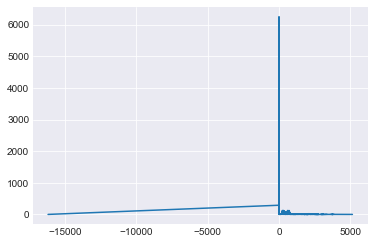

In [29]:
members_proc.membership_days.value_counts().sort_index().plot()

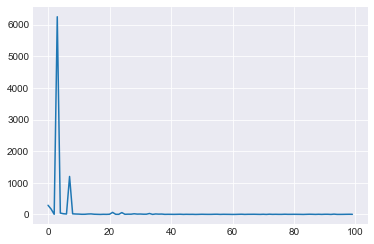

In [30]:
members_proc.loc[members_proc.membership_days.isin(range(0, 100)), 'membership_days'].value_counts().sort_index().plot()

In [31]:
members_proc['membership_days_bin'] = pd.qcut(members_proc.membership_days, 3)

In [32]:
members_proc.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,expiration_date_year,membership_days,membership_days_bin
5319,OIfFEm7erUzeXDsJFOoABp1eb0mM+OQbha9mIWiBx0Q=,5,51,female,4,20160831,20170115,2016,2017,137,"(-16191.001, 301.0]"
3766,PbSQ2KxR4gRnzjsRd8Up75qMYb70iuMwGk10/jPRljk=,5,33,male,9,20110914,20180207,2011,2018,2338,"(1390.0, 5149.0]"
9878,OPwYweghY84e6PdAmD+HUsUsIMFhpgqMBS7TSi0Nqtg=,1,0,missing,4,20160625,20160628,2016,2016,3,"(-16191.001, 301.0]"
25858,DYMkRga4EUKtl3T+rc7X8wdVrsgPjtZ5v92SucLfuPg=,1,0,missing,7,20161230,20170930,2016,2017,274,"(-16191.001, 301.0]"
10402,EWW2/7JdAbXoYTJEmNAxAFIFdGZ45XgaJ3DUS1p/fAY=,5,22,male,3,20141101,20150615,2014,2015,226,"(-16191.001, 301.0]"
11236,vRd2ZQcDo4uEzsQjOHeQmIqgdRQptC2fGr5dpHnUOys=,1,0,missing,4,20161107,20170713,2016,2017,248,"(-16191.001, 301.0]"
28769,qGlI07wEZpuQGYHKc4g0qfpLBjh6rAe25hvhI87xhR8=,1,0,missing,9,20150807,20170718,2015,2017,711,"(301.0, 1390.0]"
30320,NdGbY4RW1THUxOSM5fNVDBp6TqgKu7P9rXTcSD01aPA=,7,0,missing,3,20130916,20170615,2013,2017,1368,"(301.0, 1390.0]"
19895,qN/mZKd5lPK2lKyqlqb+ksjeNSL+rhiewH2p7sEzWUY=,5,17,male,4,20160124,20171229,2016,2017,705,"(301.0, 1390.0]"
24012,FPsyogmcNB8QKibMa6iexJWwe4P7enRI2CBCQCs9v5o=,1,0,missing,4,20160606,20160616,2016,2016,10,"(-16191.001, 301.0]"


In [33]:
members_proc.drop(columns=['bd', 'registration_init_time', 'expiration_date', 'expiration_date_year', 'membership_days'], inplace=True)

In [34]:
members_proc = pd.get_dummies(members_proc, columns=['city', 'gender', 'registered_via', 'registration_init_time_year', 'membership_days_bin'])

In [35]:
members_proc.sample(10)

,msno,city_1,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,city_11,city_12,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22,gender_female,gender_male,gender_missing,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_13,registered_via_16,registration_init_time_year_2004,registration_init_time_year_2005,registration_init_time_year_2006,registration_init_time_year_2007,registration_init_time_year_2008,registration_init_time_year_2009,registration_init_time_year_2010,registration_init_time_year_2011,registration_init_time_year_2012,registration_init_time_year_2013,registration_init_time_year_2014,registration_init_time_year_2015,registration_init_time_year_2016,registration_init_time_year_2017,"membership_days_bin_(-16191.001, 301.0]","membership_days_bin_(301.0, 1390.0]","membership_days_bin_(1390.0, 5149.0]"
33964,ai8YZA/AwZUx6X0SNzAPA6WX8haTmxrBXB7v0lpb1UY=,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
17119,Quzc5CU/7JG86wGLvkUpKD6jYecLOV4mdByvI9PiEOg=,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
18364,UF71aqe9sB90WXXtnjBImBLPVpccJOEAksVMBxp28GI=,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
18745,m1Zkssir7E62WL72BOPI3lJVutRd7rui0RnuZuJSuU0=,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2360,zn90b58dMYs6ZYFD81vffgSWFb/BfOY57eGZhjKad6o=,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
23283,A7Bl/3xTD03B7cSuhHLw7dxpH0mVXjOZ3ZWpMTk3rn0=,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
13112,zBlHVNq1Hqs2mZ8Pcp5g8jJAZv0RSVH0WtqvHZm0Lyc=,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
25721,QZJKD6ql8+dqJoqGpwcCsSuo5qjVMCBxDvyNw4Iu+/Q=,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
10067,xBuKMQaMdiaPgQBc8ynTel7XKv+AMwioiRAk8LOyD7M=,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9081,MSGebTOUtH2n4OKC2wDpO/VRPw20Aq3jy93ZrgeFhpI=,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## 2. Preprocess songs.csv <a id="2.2"></a>

In [36]:
songs_raw.shape

(2296320, 7)

In [37]:
songs_raw.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [38]:
songs_raw.describe(include='all')

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
count,2296320,2.296320e+06,2202204,2296320,1224966,351052,2.296319e+06
unique,2296320,NaN,1045,222363,329823,110925,NaN
top,mAlwVH2d4is1GDSR6NeLFH3tnvY+avxrs6zrlUH3sd8=,NaN,465,Various Artists,Neuromancer,Traditional,NaN
freq,1,NaN,567911,145916,17888,1751,NaN
mean,NaN,2.469935e+05,NaN,NaN,NaN,NaN,3.237800e+01
std,NaN,1.609200e+05,NaN,NaN,NaN,NaN,2.433241e+01
min,NaN,1.850000e+02,NaN,NaN,NaN,NaN,-1.000000e+00
25%,NaN,1.836000e+05,NaN,NaN,NaN,NaN,-1.000000e+00
50%,NaN,2.266270e+05,NaN,NaN,NaN,NaN,5.200000e+01
75%,NaN,2.772690e+05,NaN,NaN,NaN,NaN,5.200000e+01


In [39]:
songs_raw.isna().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [40]:
songs_proc = songs_raw.copy()

### song_length

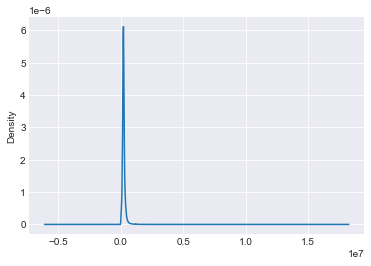

In [41]:
songs_proc.song_length.plot(kind='kde')

In [42]:
songs_proc.song_length.min()

185

In [43]:
songs_proc['song_length_bin'] = pd.qcut(songs_proc.song_length, 3)

### genre_ids

In [44]:
genres = list()
for gs in tqdm(songs_proc.genre_ids):
    if not pd.isna(gs):
        genres += gs.split('|')
counter = Counter(genres)
counter.most_common(10)

100%|██████████| 2296320/2296320 [00:02<00:00, 1042229.77it/s]


[('465', 589220),
 ('958', 182836),
 ('1609', 177258),
 ('2022', 176531),
 ('2122', 149608),
 ('1259', 103904),
 ('921', 74983),
 ('1152', 65463),
 ('786', 59438),
 ('139', 56405)]

In [45]:
top_genres = list(map(lambda x: x[0], filter(lambda x: x[1] > 100000, counter.items())))
for tg in tqdm(top_genres):
    column_name = 'genre_id_{}'.format(tg)
    values = list()
    for gs in songs_proc.genre_ids:
        value = 0
        if not pd.isna(gs) and tg in gs.split('|'):
            value = 1
        values.append(value)
    songs_proc[column_name] = values

100%|██████████| 6/6 [00:14<00:00,  2.37s/it]


### language

In [46]:
songs_proc[songs_proc.language.isna()]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_length_bin,genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958
605127,nMZ7IRARPBit0ZGegNfecsx77LQSpH2ZY93vyd5xRy0=,178654,444,JONGHYUN,Korean Lyrics by Kim| Jong Hyun / Lee| Yoon Se...,31,NaN,"(184.999, 199505.0]",0,0,0,0,0,0


In [47]:
songs_proc['language'] = songs_proc.language.fillna(31)
songs_proc['language'] = songs_proc.language.astype(int)

In [48]:

songs_proc[songs_proc.language.isna()]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_length_bin,genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958


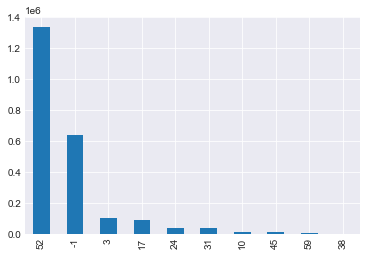

In [49]:
songs_proc.language.value_counts().plot(kind='bar')

In [50]:
songs_proc.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_length_bin,genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958
316137,TNATbSeXy1WBtVqxrLhp3FG7V4wG+5JUOt4GOiwiuyk=,331337,212,Various Artists,Jimmy Van Heusen,NaN,52,"(256757.333, 12173850.0]",0,0,0,0,0,0
464902,Ud5Z7sSDPTMuS0lPpPeKfedXtDKBdWIzEx7iCvS2xVI=,286720,465,Elemeno P,D Gibson|J Pilbrow,NaN,52,"(256757.333, 12173850.0]",1,0,0,0,0,0
654968,v1KzHr6u/X8Rg0OC9OEfeWpOgy0DCQdFAtXEc4d1QjU=,278360,1152,RELAX WORLD,ＲＥＬＡＸ ＷＯＲＬＤ,NaN,17,"(256757.333, 12173850.0]",0,0,0,0,0,0
12748,ZV7lb++gX9vHQdZi0AdMU6E6XE8fEIK8QMZ7v5XnkZQ=,181577,444,Eddy Kim,NaN,NaN,31,"(184.999, 199505.0]",0,0,0,0,0,0
1899741,kmk8tBNEDTgZ9x+Ou64FGUX/OVAIq2Nr0gOagnrmEQo=,182508,NaN,Sesame Street,NaN,NaN,52,"(184.999, 199505.0]",0,0,0,0,0,0
2144819,NCE/TAbBUVmdSh0Kcp7in2UkeibGKdIrukMk7nqToXA=,75023,NaN,Christmas Hits Collective| Dj Christmas| Silen...,NaN,NaN,52,"(184.999, 199505.0]",0,0,0,0,0,0
1349609,gtMyBgvn8Sir9kYJY9oGz6qX8iMFhAwN8bmVe/dBzqk=,174811,465|1259,Liryc,NaN,NaN,52,"(184.999, 199505.0]",1,0,0,0,1,0
322522,4akRKRXLF/YQN/QQVa3gs96T9vEKfWqoaAKcx5JIHDk=,189196,2122,Ella Fitzgerald,"William Pat"" Best""",NaN,-1,"(184.999, 199505.0]",0,0,0,1,0,0
1480826,WoZNM8L0ld5AAWZ1G8WpQrK5avCjh+Tchsq/XA3gLys=,355892,352|1995,Oasis,Noel Gallagher,Noel Gallagher,52,"(256757.333, 12173850.0]",0,0,0,0,0,0
85703,DA8S0JNvoQFQxzLGqeLsZllrwMtBM6n6cdgDSCFyudg=,226220,242,Alex Aiono,NaN,NaN,-1,"(199505.0, 256757.333]",0,0,0,0,0,0


In [51]:
songs_proc.drop(columns=['song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist'], inplace=True)

In [52]:
songs_proc = pd.get_dummies(songs_proc, columns=['song_length_bin', 'language'])

In [53]:
songs_proc.sample(10)

,song_id,genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958,"song_length_bin_(184.999, 199505.0]","song_length_bin_(199505.0, 256757.333]","song_length_bin_(256757.333, 12173850.0]",language_-1,language_3,language_10,language_17,language_24,language_31,language_38,language_45,language_52,language_59
1501603,1mtMnsvarIzAN1rkiQSPlzOtkq0shWU+DKIBs//dGQc=,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1440040,+rINazIMZCivgiUI6G91FThnwVOjx1MhrUF8r8oFWiI=,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1718909,oQSYnvSYLCFICI3lC3Ly2G2WojicTDtsV2ZeJps+kU8=,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2112444,ikuNwTpxr8YNtch3YAojOx/MIsKwyPqO59ETtITLpY8=,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
1133127,mrj1d8EzqS9T5TJS7B7Tka4rYmRj4geF21HJS/4PPG8=,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1955969,KuPz371jG4Rt7EvC9Sld8e3qsx7ewJ6BH5H51rYAxL4=,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1097330,XppMINrhtIrNYeEsWOssdFpIDA8U4uinZsPtG8Rc5j0=,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
99333,1EBlGJomyW0tezenKn7t73x656u3pnIQ9L47rsiXM2E=,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1681319,S9Bq5pLVZsMSesZtjk0+ceVlK3JmOIVFaiHNXUaPFNU=,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1357096,zfdntgPy/7RgahniKyFJCtFIPrVUI+LIQmJOX24AnF8=,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## 3. Preprocess song_extra_info.csv

In [96]:
song_extra_info_raw.shape

(2295971, 3)

In [97]:
song_extra_info_raw.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [98]:
song_extra_info_raw.describe(include='all')

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,mAlwVH2d4is1GDSR6NeLFH3tnvY+avxrs6zrlUH3sd8=,Intro,GBPS81518952
freq,1,1734,207


In [99]:
song_extra_info_raw.isna().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [100]:
song_extra_info_proc = song_extra_info_raw.copy()

### isrc

In [101]:
def isrc_to_year(isrc):
    if pd.isna(isrc):
        return -1

    sub = isrc[5:7]
    if int(sub) > 18:
        sub = '19' + sub
    else:
        sub = '20' + sub
    return int(sub)

In [102]:
song_extra_info_proc['isrc_year'] = song_extra_info_proc.isrc.apply(isrc_to_year)

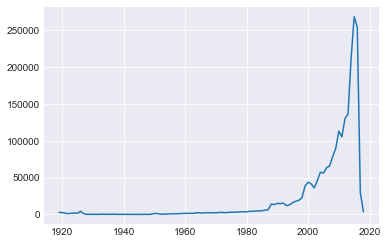

In [103]:
song_extra_info_proc.loc[song_extra_info_proc.isrc_year != -1, 'isrc_year'].value_counts().sort_index().plot()

In [104]:
song_extra_info_proc['isrc_year_bin'] = pd.qcut(song_extra_info_proc.isrc_year, 5)

In [105]:
def isrc_to_country(isrc):
    if not pd.isna(isrc):
        country = isrc[:2]
        return str(country)


In [106]:
song_extra_info_proc['isrc_country'] = song_extra_info_proc.isrc.apply(isrc_to_country)

In [107]:
top_countries = song_extra_info_proc.isrc_country.value_counts()[:6].index
top_countries

Index(['US', 'GB', 'DE', 'FR', 'TC', 'JP'], dtype='object')

In [108]:
for tc in tqdm(top_countries):
    column_name = 'country_{}'.format(tc)
    values = list()

    for c in song_extra_info_proc.isrc_country:
        value = 0
        if not pd.isna(c) and c == tc:
            value = 1
        values.append(value)

    song_extra_info_proc[column_name] = values

100%|██████████| 6/6 [00:12<00:00,  2.05s/it]


In [109]:
song_extra_info_proc.sample(10)

,song_id,name,isrc,isrc_year,isrc_year_bin,isrc_country,country_US,country_GB,country_DE,country_FR,country_TC,country_JP
67226,fW3L7YkO69sSEcH/mH6YNhGsNDcxQbTU+EYaXk/lS9A=,XXXIII,GBCKK0811033,2008,"(1999.0, 2008.0]",GB,0,1,0,0,0,0
1714202,DNMK/jrfnCvggcvPppBq2CqI2RrWK1PMro2Ddk0pN4M=,不再問究竟,HKI498521204,1985,"(-1.001, 1999.0]",HK,0,0,0,0,0,0
2053315,BprcZPfbLNxAmz1JDtpPuLzuOUQbwrVsZ7DQSdOteRQ=,F.S.T. (Opening Theme),USBN29900666,1999,"(-1.001, 1999.0]",US,1,0,0,0,0,0
1274802,4AZKxe+LAKOxplDnXjSTKobNQSjXUcm4DF59oKx4RI4=,Dolores,USTN10216435,2002,"(1999.0, 2008.0]",US,1,0,0,0,0,0
584697,vXGw5Wf6/i8iBcHuzARCz9gesR9z7Rde6DJrXZAEFfM=,A Festa,BRWMB0300633,2003,"(1999.0, 2008.0]",BR,0,0,0,0,0,0
1639945,1n6tYHafPd4qZfTl+rNq+F0ElRyBpglnORFw2H3/9DI=,The Nearness of You,BRFIN1600092,2016,"(2015.0, 2018.0]",BR,0,0,0,0,0,0
214174,q0UIwbU5fZaXMDoYNZe3WoWgQxmUenMbZ48IIDy6KKs=,心のままに,JPB601600099,2016,"(2015.0, 2018.0]",JP,0,0,0,0,0,1
400183,3ojX8apbmO3ahjLjhlutBIM7E1k1wwFe8rAFsgMrSOc=,Mr Saxobeat,ITS041100286,2011,"(2008.0, 2012.0]",IT,0,0,0,0,0,0
582670,T5SeNHpP1JmS8PiRk7Vkl3joWQkIqRC7ePEh81zSPzk=,Monoula mou,DEPZ69390783,1993,"(-1.001, 1999.0]",DE,0,0,1,0,0,0
295282,Gx/gXeTE2eTtgXYcWl302EkXD1YtlMQiHNIVGQ/i3OI=,Baby Cruising Love,JPTK00714090,2007,"(1999.0, 2008.0]",JP,0,0,0,0,0,1


In [110]:
song_extra_info_proc.drop(columns=['name', 'isrc', 'isrc_year', 'isrc_country'], inplace=True)

In [111]:
song_extra_info_proc = pd.get_dummies(song_extra_info_proc, columns=['isrc_year_bin'])

In [114]:
song_extra_info_proc.sample(10)

,song_id,country_US,country_GB,country_DE,country_FR,country_TC,country_JP,"isrc_year_bin_(-1.001, 1999.0]","isrc_year_bin_(1999.0, 2008.0]","isrc_year_bin_(2008.0, 2012.0]","isrc_year_bin_(2012.0, 2015.0]","isrc_year_bin_(2015.0, 2018.0]"
1782742,F4Dapo4UuJhkpbRH9ZpgGcsxQkSxhChKVCi//jEki94=,0,0,0,0,0,0,0,1,0,0,0
234987,vbL/xCE2fM2DYq7Aw46sfAEHa9v/GkIRT+C8uczYNKg=,1,0,0,0,0,0,0,0,1,0,0
1313591,YnkCAvQeddKTDeRj+aqOjCO1qkm6J6YpItohKkyexGw=,0,0,0,1,0,0,1,0,0,0,0
1346177,dPPecJ+pGBnwqwilz/HMnObwT7bneWrxT194hivSdOg=,1,0,0,0,0,0,0,0,0,1,0
1589660,2RrDq8OlXqiJko2ceo/9QpGNOYr8yGSqwfJnDW+jAmc=,0,0,0,1,0,0,1,0,0,0,0
1949985,yjT2z5/azPe+KZl2GHLQyCoiHtrFgCkHds8C25A4OQ8=,0,0,0,0,0,0,0,0,0,1,0
318070,+WkcnFddZP/GK7UGyq88hYtpF9kq6YcQV45bTAQ03WE=,1,0,0,0,0,0,0,0,1,0,0
1374091,UDLSsxsxvPd5iIrjfQC2wC592zte6fjErW0WuHsfl2M=,0,0,0,0,0,0,0,0,0,1,0
2270454,UQaQ2C5wd0pjHVc275uBuWAjTnbpM+0hzTfmxB3+KEk=,0,1,0,0,0,0,0,0,1,0,0
1612330,HRaFOGImq/3/RvrOqLwdNRYuQGkinFVPl0jzkcteMAg=,0,1,0,0,0,0,0,0,0,0,1


In [116]:
songs_extra_proc = pd.merge(left=songs_proc, right=song_extra_info_proc, how='left', on='song_id')
songs_extra_proc = songs_extra_proc.fillna(0)
songs_extra_proc.loc[:, song_extra_info_proc.columns[1:]] = songs_extra_proc.loc[:, song_extra_info_proc.columns[1:]].astype(int)

NameError: name 'sogns_extra_proc' is not defined

In [120]:
songs_extra_proc.sample(10)

,song_id,genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958,"song_length_bin_(184.999, 199505.0]","song_length_bin_(199505.0, 256757.333]","song_length_bin_(256757.333, 12173850.0]",language_-1,language_3,language_10,language_17,language_24,language_31,language_38,language_45,language_52,language_59,country_US,country_GB,country_DE,country_FR,country_TC,country_JP,"isrc_year_bin_(-1.001, 1999.0]","isrc_year_bin_(1999.0, 2008.0]","isrc_year_bin_(2008.0, 2012.0]","isrc_year_bin_(2012.0, 2015.0]","isrc_year_bin_(2015.0, 2018.0]"
2040117,W1F8Fv1C9TRTrQMp01rMVsdlOxKwVs7X3jVRCwNEK64=,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
329278,vgwkQrDhXojwoKxtL6qRKN7Iz7uxuCkqUEzsGW7zvKY=,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
384500,rWQjfG9ytCACcvFg9frgGtbu457Ekd+YEvvriVo6HA4=,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
190545,QrVW1izjqDqRf4uh2LAEt5hVD7aXtSpzZRU/vhC0LFU=,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1402853,vt4DfydnqXnieoxABCHlkloYMpw7WVtgA48IBu8Fi8A=,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1493333,R1FbMOu0K+sPWQzh062zDCytBl8doDia2VZ5uM4Z1rs=,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2173796,0Xq8u/SdtPWGubF95s4wEp4/WqlLaFxgHky9Wahx16k=,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1031501,y6MuaLoSMDIgHnhuDJzNMV3u2vdJ3BRJwL7bSYqTfZ4=,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1922728,HfB6SmhTZdAu46h72IpDDVGLhtPMVRT7kSpZFuVJ0qA=,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1282787,beXxLfAiy+oCvNeG1M6surPoxlsH51QZx+Tm1fmCKp8=,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


## 4. Preprocess train.csv and test.csv <a id="2.4"></a>

In [122]:
train_raw.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [123]:
test_raw.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [128]:
train_raw.describe(include='all')

,msno,song_id,source_system_tab,source_screen_name,source_type,target
count,7377418,7377418,7352569,6962614,7355879,7.377418e+06
unique,30755,359966,8,20,12,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN
freq,5819,13973,3684730,3228202,2261399,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


In [129]:
test_raw.describe(include='all')

,id,msno,song_id,source_system_tab,source_screen_name,source_type
count,2.556790e+06,2556790,2556790,2548348,2393907,2549493
unique,NaN,25131,224753,8,22,12
top,NaN,KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=,ZcKgNis1AP1LA0sdtIddrtk7P04iiJzJrXvwXdT/X3Q=,my library,Local playlist more,online-playlist
freq,NaN,2489,8320,1019492,845115,774532
mean,1.278394e+06,NaN,NaN,NaN,NaN,NaN
std,7.380818e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,6.391972e+05,NaN,NaN,NaN,NaN,NaN
50%,1.278394e+06,NaN,NaN,NaN,NaN,NaN
75%,1.917592e+06,NaN,NaN,NaN,NaN,NaN


In [130]:
train_raw.isna().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [131]:
test_raw.isna().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [174]:
train_proc = train_raw.copy()
test_proc = test_raw.copy()

### source_system_tab

In [175]:
def fill_binary(df, column, name, base):
    values = list()
    for t in df.loc[:, column]:
        value = 0
        if not pd.isna(t) and t == base:
            value = 1
        values.append(value)
    
    df[name] = values    

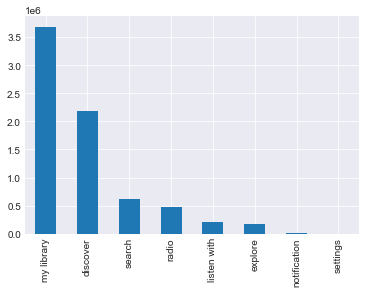

In [176]:
train_proc.source_system_tab.value_counts().plot(kind='bar')

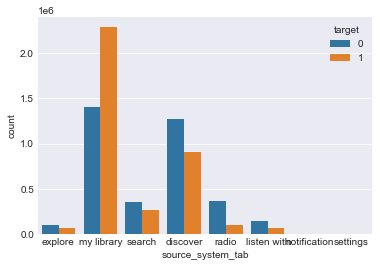

In [177]:
sns.countplot('source_system_tab', data=train_proc, hue='target')

In [178]:
top_source_system_tab = train_proc.source_system_tab.value_counts().index[:4]
top_source_system_tab

Index(['my library', 'discover', 'search', 'radio'], dtype='object')

In [179]:
for tab in tqdm(top_source_system_tab):
    column_name = 'source_system_tab_{}'.format(tab)
    fill_binary(train_proc, 'source_system_tab', column_name, tab)
    fill_binary(test_proc, 'source_system_tab', column_name, tab)

100%|██████████| 4/4 [00:31<00:00,  7.76s/it]


### source_screen_name

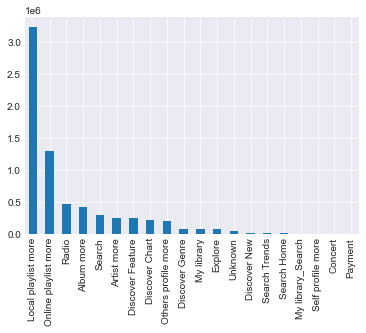

In [180]:
train_proc.source_screen_name.value_counts().plot(kind='bar')

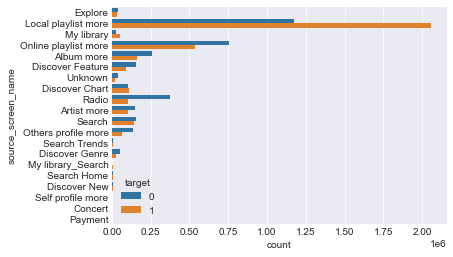

In [181]:
sns.countplot(y='source_screen_name', data=train_proc, hue='target')

In [182]:
top_source_screen_name = train_proc.source_screen_name.value_counts().index[:9]
top_source_screen_name

Index(['Local playlist more', 'Online playlist more', 'Radio', 'Album more',
       'Search', 'Artist more', 'Discover Feature', 'Discover Chart',
       'Others profile more'],
      dtype='object')

In [183]:
for name in tqdm(top_source_screen_name):
    column_name = 'source_screen_name_{}'.format(name)
    fill_binary(train_proc, 'source_screen_name', column_name, name)
    fill_binary(test_proc, 'source_screen_name', column_name, name)

100%|██████████| 9/9 [01:08<00:00,  7.62s/it]


### source_type

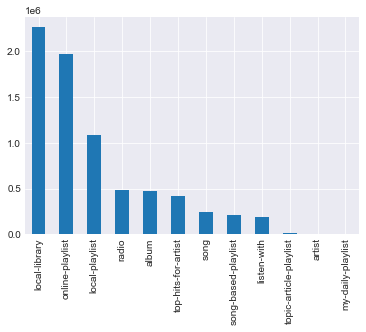

In [184]:
train_proc.source_type.value_counts().plot(kind='bar')

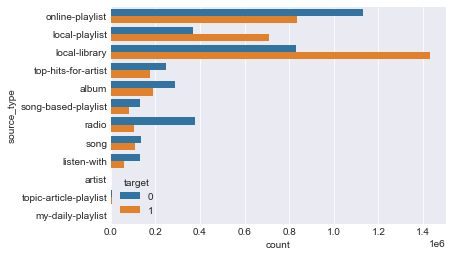

In [185]:
sns.countplot(y='source_type', data=train_proc, hue='target')

In [186]:
top_source_type = train_proc.source_type.value_counts().index[:6]
top_source_type

Index(['local-library', 'online-playlist', 'local-playlist', 'radio', 'album',
       'top-hits-for-artist'],
      dtype='object')

In [187]:
for typ in tqdm(top_source_type):
    column_name = 'source_type_{}'.format(typ)
    fill_binary(train_proc, 'source_type', column_name, typ)
    fill_binary(test_proc, 'source_type', column_name, typ)

100%|██████████| 6/6 [00:47<00:00,  7.96s/it]


In [188]:
train_proc.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source_system_tab_my library,source_system_tab_discover,source_system_tab_search,source_system_tab_radio,source_screen_name_Local playlist more,source_screen_name_Online playlist more,source_screen_name_Radio,source_screen_name_Album more,source_screen_name_Search,source_screen_name_Artist more,source_screen_name_Discover Feature,source_screen_name_Discover Chart,source_screen_name_Others profile more,source_type_local-library,source_type_online-playlist,source_type_local-playlist,source_type_radio,source_type_album,source_type_top-hits-for-artist
4824919,4/hz5NPplxIk/YJKjMOG4dDwTtBNzbz//nOqAegEQIA=,6XK7xWtTdVsIHnNxm8+ZFuvZU2nPql4g8cIcm0uMCYg=,my library,NaN,song,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3188835,JVhD20R1AK+Xb6y7QylVBDh3dXsuE67v5I2W7Sba1uU=,5Ws66j+GIEaJEAcyz+rh9UfhuzrtQ9KJ6I5TCtC927M=,my library,Local playlist more,local-playlist,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2098905,sPTWtTllzkc4zWVcQ0EERGlyvC7HOOAXquVyonu+ZWE=,OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=,discover,NaN,online-playlist,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3832050,zYmfJw685aIsoL/dL8TCkflAYVDvJK5sX8m6LAk3CbA=,WVqIAwaJS+o8sDUtdqXZUs0jzteWgMRxFmhzAZ7Pkz0=,search,Search,song,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3157168,qncZyvVkIoAYoSaiDXo8qweD6I+c5RvFAbsIcInXolg=,S8JQvJSXJPlXGEE6+Hr+zpAMCIQqAHLqurGniriO13k=,my library,Local playlist more,local-library,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2578743,XiVsXT316zcout2XExGChQwUSvRXgfFq65TRtmZbyQQ=,W4lj0YvJuHhM/taFRqfNksN9CSKecmPWnbvQ9x9+3tA=,radio,Radio,radio,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2722561,FCxFgvq/lyJuKYet5zNup2bhrLBcGydJHXNvEwHQwyw=,SBnweWoCH+RbRlFpgt5WNGD3HtY7uGkQql84esZJ/+g=,search,Artist more,top-hits-for-artist,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2906277,smpmdFJG23bvY+XiJII4LC7dGvKiybVmHy2gSaVTWxg=,bO2PXKKq1KOwa9WkEWnJX5XISVny6X1WPMPus73jILg=,listen with,Others profile more,song,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4091954,kNyR9tkGvEkqWjFFN1kmAuE8kMaOY+1mnkeSii539VI=,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,my library,Local playlist more,local-library,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6479351,mzCPtmbJdQ7zOoRDQdo3bDjHce6ATDqjL+wwH9PeQjs=,gqIw2ATaMo4T5wK0YOPLglgORHmqp4mMs8Jl9jDC6P4=,radio,Radio,radio,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [189]:
test_proc.sample(10)

,id,msno,song_id,source_system_tab,source_screen_name,source_type,source_system_tab_my library,source_system_tab_discover,source_system_tab_search,source_system_tab_radio,source_screen_name_Local playlist more,source_screen_name_Online playlist more,source_screen_name_Radio,source_screen_name_Album more,source_screen_name_Search,source_screen_name_Artist more,source_screen_name_Discover Feature,source_screen_name_Discover Chart,source_screen_name_Others profile more,source_type_local-library,source_type_online-playlist,source_type_local-playlist,source_type_radio,source_type_album,source_type_top-hits-for-artist
654594,654594,xGHsP7fSwA70wWUlgAShEKUGd6hGxPTM/HJRiTTlKKA=,IQ24lLLFZsgsilNq8MC+MZN8oZdx1FX8GeJsprbblwA=,my library,Local playlist more,local-playlist,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1831917,1831917,Lx+UW9ARQJhFsjkAREIBnxv0/lGh1YdFB607Ic37sOo=,iA+Ia/9kXHZesqMqEpkp3ZF8oGoM26sEowvUXaoQo6k=,search,Search,song,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
158331,158331,PFDtXphGre9ostqRqQJyRtok8+6zKzHSswRQjGJqiYc=,mU6Q+b5jnuX1Fp5xiDiWbD0flfpENhVqOHJ7OjdZbeA=,search,Album more,album,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2186050,2186050,HA4g/Zm+hj21nPbvdWNNhhTqtSryL6vp8UZfRXdgIbs=,ho2Aq1awuOMhvyutKOCYPveaRboyr9Rq6wepuBl11ik=,search,Artist more,top-hits-for-artist,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
560322,560322,9vZqWe4V3RTVRhy6IkFHRK3ZXxDgsOEd9vtRZfNQdi8=,J5l5uSAlXV8Lv+TkzYvPDMrkybQ5Q413REeQMWtnEJw=,discover,Discover Genre,online-playlist,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
129891,129891,IWVGlflRyB1pLBNrFIWWGZpKCvCYiB70GT7BFUbFbPs=,EUUnpIrpI9QY9FVBsNjEL8TvXGjsCLQ0syQt/QV9j50=,my library,Local playlist more,local-playlist,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1889605,1889605,qHilB0G66d7Oraa5wJ7tPX9D5ntu/+YHiXS7FHX33P4=,o+fLXtu2auUsQNTfB141c7dPE5HnkvVF9wjBK5dHSjk=,my library,Local playlist more,local-playlist,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2068162,2068162,dmAQ1cnUMdvpk2MWq8KQMNYiMVeVmZBqq2OeRnoLjpE=,b4a6l3SMF6YB/Uy4Y3HdTqDL9J6SmgfCIqMOX2WoI1Q=,my library,Local playlist more,local-library,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
513622,513622,fgKu/gOYV9PPNO0O9hWU5d6B7j0KcmP01s4yJNy0/s4=,noCEdXIa/z1BUwbsKA2ewW+TN+FJx9FXODUbLduPNrg=,discover,Search,song,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1566798,1566798,auzYzyIreqIBEM5flqLoXx6QcRJ5hjL0Y6COmHhnROk=,PRQixhPrPLRsBxO9SYplmlGhIaBp0Iu3pDbxkGmWVy8=,discover,Album more,album,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [191]:
train_proc.drop(columns=['source_system_tab', 'source_screen_name', 'source_type'], inplace=True)
test_proc.drop(columns=['source_system_tab', 'source_screen_name', 'source_type'], inplace=True)

In [194]:
assert list(train_proc.columns[3:]) == list(test_proc.columns[3:])

In [202]:
train_final = pd.merge(left=train_proc, right=members_proc, how='left', on='msno')
train_final = pd.merge(left=train_final, right=songs_extra_proc, how='left', on='song_id')
train_final = train_final.fillna(0)
train_final.loc[:, train_final.columns[3:]] = train_final.loc[:, train_final.columns[3:]].astype(int)

In [203]:
test_final = pd.merge(left=test_proc, right=members_proc, how='left', on='msno')
test_final = pd.merge(left=test_final, right=songs_extra_proc, how='left', on='song_id')
test_final = test_final.fillna(0)
test_final.loc[:, test_final.columns[3:]] = test_final.loc[:, test_final.columns[3:]].astype(int)

In [204]:
train_final.sample(10)

,msno,song_id,target,source_system_tab_my library,source_system_tab_discover,source_system_tab_search,source_system_tab_radio,source_screen_name_Local playlist more,source_screen_name_Online playlist more,source_screen_name_Radio,source_screen_name_Album more,source_screen_name_Search,source_screen_name_Artist more,source_screen_name_Discover Feature,source_screen_name_Discover Chart,source_screen_name_Others profile more,source_type_local-library,source_type_online-playlist,source_type_local-playlist,source_type_radio,source_type_album,source_type_top-hits-for-artist,city_1,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,city_11,city_12,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22,gender_female,gender_male,gender_missing,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_13,registered_via_16,registration_init_time_year_2004,registration_init_time_year_2005,registration_init_time_year_2006,registration_init_time_year_2007,registration_init_time_year_2008,registration_init_time_year_2009,registration_init_time_year_2010,registration_init_time_year_2011,registration_init_time_year_2012,registration_init_time_year_2013,registration_init_time_year_2014,registration_init_time_year_2015,registration_init_time_year_2016,registration_init_time_year_2017,"membership_days_bin_(-16191.001, 301.0]","membership_days_bin_(301.0, 1390.0]","membership_days_bin_(1390.0, 5149.0]",genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958,"song_length_bin_(184.999, 199505.0]","song_length_bin_(199505.0, 256757.333]","song_length_bin_(256757.333, 12173850.0]",language_-1,language_3,language_10,language_17,language_24,language_31,language_38,language_45,language_52,language_59,country_US,country_GB,country_DE,country_FR,country_TC,country_JP,"isrc_year_bin_(-1.001, 1999.0]","isrc_year_bin_(1999.0, 2008.0]","isrc_year_bin_(2008.0, 2012.0]","isrc_year_bin_(2012.0, 2015.0]","isrc_year_bin_(2015.0, 2018.0]"
5852545,6+t89Efx6Ha5iCzKe7fdY9nNZkuyfIlk1CPhho9hhNk=,n+FLlTL+LrNTa6xpoGkESEzlUMb/hPEM1nLq2U6fEp0=,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7221757,ppG6OPYo9dj8/44YFZAxwjV7tFScpvY3U4x6bmqxyS0=,IlNTgOUmmXElav8hTkv9ps73MvfeAgAGEQMGDEYD5xs=,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1780559,kRh4sRbbr2Et+idnNoqQUX0QoOMert1U0G90LlnKCdE=,ZUmOKRdHNbZW/WwK6LnPY4aYe/t7zO0mOTDsHaBcxOw=,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2259859,6B/HqAzYdqKJtNqUEWNVXtKG0RZ7ENUG3bUkMmzpHEw=,msJWKceAKkJe5FJDUUpnHBL8qS3QQUC2faxjiJrEw5w=,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5091687,Ich3ucExmcxCabjFXLEOjhPnADl0+1N0/G9sEbZx7uI=,SHV52/0W8kZcf3uJZF9+ZP3S5vu2RO4WNGhZ8qQHulU=,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1225871,OHRtginG8VMGOkEHIOZIUsI25STd9NFOuOX8kXyDbJM=,92cTmAJZF+bihvsLTeo3TWrawSt52y7KgEzM7xkDZ1Y=,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7324138,rJt+CPMcJXVdtFsFewPw2WBjTRxDxA2rByLyjzYaMDs=,9qUKtmbWGhpTet6U4LYGB4QH0viOzr6SUOQbsRkYJWs=,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0

In [205]:
test_final.sample(10)

,id,msno,song_id,source_system_tab_my library,source_system_tab_discover,source_system_tab_search,source_system_tab_radio,source_screen_name_Local playlist more,source_screen_name_Online playlist more,source_screen_name_Radio,source_screen_name_Album more,source_screen_name_Search,source_screen_name_Artist more,source_screen_name_Discover Feature,source_screen_name_Discover Chart,source_screen_name_Others profile more,source_type_local-library,source_type_online-playlist,source_type_local-playlist,source_type_radio,source_type_album,source_type_top-hits-for-artist,city_1,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,city_11,city_12,city_13,city_14,city_15,city_16,city_17,city_18,city_19,city_20,city_21,city_22,gender_female,gender_male,gender_missing,registered_via_3,registered_via_4,registered_via_7,registered_via_9,registered_via_13,registered_via_16,registration_init_time_year_2004,registration_init_time_year_2005,registration_init_time_year_2006,registration_init_time_year_2007,registration_init_time_year_2008,registration_init_time_year_2009,registration_init_time_year_2010,registration_init_time_year_2011,registration_init_time_year_2012,registration_init_time_year_2013,registration_init_time_year_2014,registration_init_time_year_2015,registration_init_time_year_2016,registration_init_time_year_2017,"membership_days_bin_(-16191.001, 301.0]","membership_days_bin_(301.0, 1390.0]","membership_days_bin_(1390.0, 5149.0]",genre_id_465,genre_id_1609,genre_id_2022,genre_id_2122,genre_id_1259,genre_id_958,"song_length_bin_(184.999, 199505.0]","song_length_bin_(199505.0, 256757.333]","song_length_bin_(256757.333, 12173850.0]",language_-1,language_3,language_10,language_17,language_24,language_31,language_38,language_45,language_52,language_59,country_US,country_GB,country_DE,country_FR,country_TC,country_JP,"isrc_year_bin_(-1.001, 1999.0]","isrc_year_bin_(1999.0, 2008.0]","isrc_year_bin_(2008.0, 2012.0]","isrc_year_bin_(2012.0, 2015.0]","isrc_year_bin_(2015.0, 2018.0]"
674864,674864,Y0Vf7mtRXdOoHmBm1CGr2CMnx5EWtYImexuwbgqrYxQ=,oMxvz7pKsR8szUiju1K+z8VYJGW32F4yQhN4bGReVZQ=,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1668449,1668449,JSVOVBvYL5vJv4BJ0cv4kmy6Qdujw549p9G5S6AQxfY=,iA6iE93YQkSTxMtmoKAgm/fLoBKkXUmgQiCNOG0K9vI=,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
126506,126506,5DQDcoAktYDfnlFU2k/k4pfcwbZIXRKQ/1+pgAhZqvA=,pYdBk7imf9If/p6o73bYrhp5hA4NVSBhwRatlv2ekxQ=,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
720764,720764,NayhTmjMAs9J8anDrJLBquQxMBdHDjPqw6kTDcY659E=,tat7Jzizxk5OkG4h2eXVuZjraBqojlBBZeLjot+lFwc=,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1251887,1251887,8nxZwZhblJPitgnwluykxth8GECt7IceFlTvGxTT+qw=,InNESpQNc6sYaS6LD0mc4vtuIeUbfIqX2wM+8QgKxS4=,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
735689,735689,76Wvz2hR7glese6z1IjSsaAFbzvJORsZ76Z6lNJEACo=,7eKGhG6Cojjjq+pgEe1knBgc1t6Ivl6Y/i4J+0Uydc8=,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1462426,1462426,u6GKps0qcspZ8F0bqdyNbYotvJ8j8vYpe6+jS54ZC84=,LBFRdBacp7Ob6Ada2N7uCQ47DhiNT2KjUtwOA7oSm7I=,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0

In [206]:
train_final.shape

(7377418, 99)

In [207]:
test_final.shape

(2556790, 99)

In [209]:
train_final.to_csv('../data/processed/train-model-v3.csv', index=False)
test_final.to_csv('../data/processed/test-model-v3.csv', index=False)